# Breast Cancer Eda  PCA, SVM,LR,RF,DTree,GaradientBost,GridSearchCV Param Tuning - 99% Accuracy 

**Breast Cancer Data Analysis**


![](https://www.sysmex-europe.com/fileadmin/_processed_/a/9/csm_LifeScience_StageImage_BreastCancer_1500x600-01_2498abd1e0.jpg)

In this tutorial, based on the data we are going to find out if the cancer is benign or malignant. We would use python libraries such as Numpy, Pandas and Plotly. We would use classification techniques to predict the values (1 or 0) on our dataset. 

**Source** : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Let's start off by installing and import the required libraries into our code

In [1]:
!pip3 install -q missingno 
# -q means quiet mode
# missingno is a visualization tool for missing data in pandas dataframes,-q is for quiet mode
!pip3 install -q matplotlib
!pip3 install -q plotly
!pip3 install -q plotly.graph_objects
!pip3 install -q plotly.express
!pip3 install -q plotly.io
!pip3 install -q sklearn

/home/mustafa/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/mustafa/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/mustafa/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/mustafa/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/mustafa/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will no

In [2]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msn
import sklearn.datasets as sdata
%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (18, 12)

`sklearn` provides this dataset for us to work with so we are going to be using the same library for importing our dataset and loading into a dataframe with the help of `Pandas` library

In [4]:
import os 

try:
  for file in os.listdir("../input/"):
    print(file)
except:
  for file in os.listdir("./"):
    print(file)

read_video.py
opencv
durations_client.py
encoder_sub.py
main_control.py
LFR_demo.py
navigationaction_client,py
line_video.mp4
navigation_action_server.py
camera.py
line_track_camera.py
line_track.py
utils_packg.py
publisher.py
durations_service.py
video_2022-08-01_10-57-00.mp4
robot_control_gui.py
breast-cancer-eda-pca-svm-lr-rf-dtree-gb-gsearch.ipynb
__init__.py
control_gui.py
ros_camera_opencv.py
subscriber.py
real_camera.py
__pycache__
read_camera.py


In [5]:
try:
  Data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
  Df=Data.copy()
except:
  Data = sdata.load_breast_cancer(return_X_y=False)
  col=list(Data.feature_names)+["diagnosis"]
  Datas=np.concatenate((Data.data,Data.target.reshape(-1,1)),axis=1)
  Df=pd.DataFrame(Datas,columns=col)

In [6]:
Data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
Df[:1] 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0.0


In [8]:
Df.columns=list(map(lambda x :x.replace(" ","_"),Df.columns))

In [9]:

Df.columns=list(map(lambda x :x.split("mean_")[1]+"_mean" if x.split("mean_")[0]=="" else x,Df.columns))

In [10]:
#change target value to malignant and benign
Df.diagnosis=Df.diagnosis.map({0:"malignant",1:"benign"})

In [11]:
Df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

In [12]:
Df.columns[0].split("mean_")

['radius_mean']

In [13]:
Df[:1]["radius_mean"] 

0    17.99
Name: radius_mean, dtype: float64

In [14]:
Df.iloc[:,1:]

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_error,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [15]:
Df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [16]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave_points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [17]:
Df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Exploratory Data Analysis aka EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [18]:
fig = px.histogram(Df, 
                   x='diagnosis', 
                   color_discrete_sequence=['red'],
                   title='Diagnosis Count')
fig.update_layout(bargap=0.3)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [19]:
fig = px.bar(Df, 
            x='diagnosis', 
            y='radius_mean', 
            color='perimeter_mean',
            hover_data=["radius_mean"],
            barmode='group',
            range_color=(0,10),
            title='Radius Mean vs Diagnosis')

fig.update_xaxes(showgrid=False)   #Turning the grid off
fig.update_yaxes(showgrid=False)   #Turning the grid off
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})  #removing the background color
fig.show()

In [20]:
for template in ["none"]:
    fig = px.bar(Df,
                     x="compactness_mean", 
                     y="diagnosis", 
                     color="compactness_mean",
                     log_x=True, 
                     template=template, 
                     title="Compactness Mean Vs Diagnosis")
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
    fig.show()

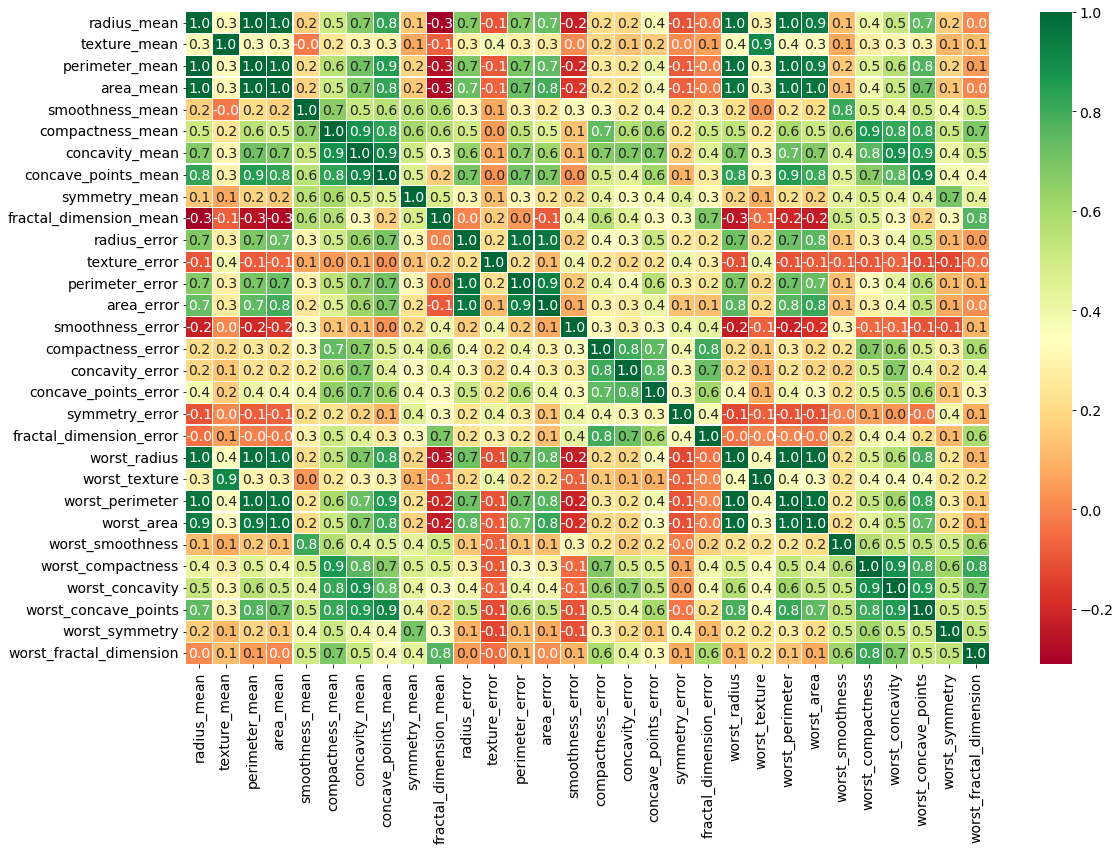

In [21]:
sns.heatmap(Df.corr(), annot=True, cmap="RdYlGn", linewidths=0.2, linecolor="white",fmt=".1f")

From our analysis above, we saw there are 357 Benign Cases and 212 Malignant breast cancer cases. Compactness Mean is more in the Malignant Cases as compared to the Benign Cases.

## Data Pre-processing
Now, lets start processing our data and make sure its in line with the requirements of the machine learning ecosystem as we wanna make sure there is no categorical data since Machine Learning Algorithms cannot work with Categorical data.

Fortunately, we don't have the categorical columns in our dataset so we are just using slicing method to make a list of columns for independent(input) and dependent variable(output)

In [22]:
Df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

In [23]:
input_cols = Df.columns[2:-1]
input_cols

Index(['perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_error', 'texture_error',
       'perimeter_error', 'area_error', 'smoothness_error',
       'compactness_error', 'concavity_error', 'concave_points_error',
       'symmetry_error', 'fractal_dimension_error', 'worst_radius',
       'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [24]:
target_var=input("Enter the target variable: ")
while True:
      if target_var not in Df.columns:
        print("Please enter a valid target variable")
        target_var=input("Enter the target variable: ")
      else:
        print("Target variable is: ",target_var)
        break





Target variable is:  diagnosis


In [25]:
inputs_df = Df[list(input_cols)].copy()
inputs_df

,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_error,texture_error,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
targets = Df[(target_var)].copy()
targets

0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
564    malignant
565    malignant
566    malignant
567    malignant
568       benign
Name: diagnosis, Length: 569, dtype: object

### Label Encoder

In [27]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(targets)
targets = le.transform(targets)

### Data Scaling

We want to scale the data as in the machine learning algorithms if the values of the features are closer to each other there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Df[input_cols])
Df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].describe().loc[['min', 'max'],:]

,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_error,texture_error,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
min,43.79,143.5,0.05263,0.01938,0.0000,0.0000,0.106,0.04996,0.1115,0.3602,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504
max,188.50,2501.0,0.16340,0.34540,0.4268,0.2012,0.304,0.09744,2.8730,4.8850,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750


## Principal Component Analysis (PCA)
Principal Component Analysis is a way to reduce the number of variables while maintaining the majority of the important information. It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as principal components.

The main objective of PCA is to simplify your model features into fewer components to help visualize patterns in your data and to help your model run faster. Using PCA also reduces the chance of overfitting your model by eliminating features with high correlation.

In [29]:
from sklearn.preprocessing import scale
from sklearn import decomposition
X = scale(inputs_df)
pca = decomposition.PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [30]:
scores = pca.transform(X)
cols=[f'PCA{i+1}' for i in range(10)]
scores_df = pd.DataFrame(scores, columns=cols)
scores_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,9.531096,1.108830,-0.843797,-1.589995,-1.694284,1.861577,2.070913,-0.244596,-0.115783,0.571793
1,1.928668,-3.689054,-0.437232,0.475673,-0.801096,0.218342,0.082064,0.260492,-0.535867,-1.344321
2,5.459521,-1.287669,-0.495919,-0.305566,-0.792833,0.778376,-0.695599,-0.045583,-0.179856,-0.217638
3,7.930070,9.621404,-3.236580,-3.009072,0.626611,3.009620,1.515908,1.140992,-1.348747,1.477256
4,3.709368,-2.074558,1.596699,0.152846,-2.511063,-0.643884,-0.912751,0.592810,-0.192064,-0.528598


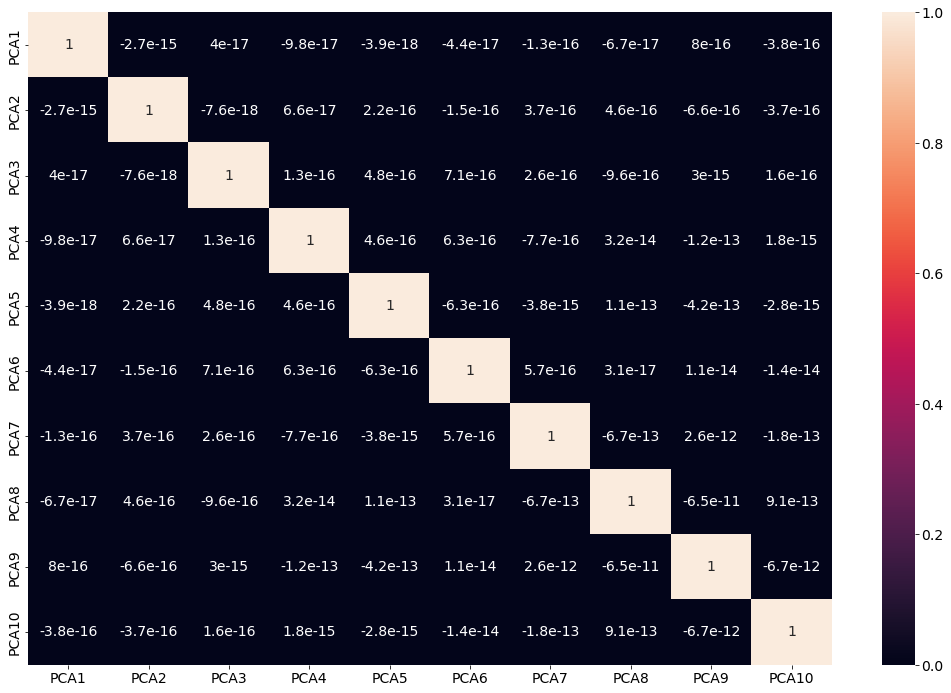

In [31]:
sns.heatmap(scores_df.corr(),annot=True,fmt=".2g")

In [32]:
target = pd.Series(targets, name='target')
target

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [33]:
result_df = pd.concat([scores_df, target], axis=1)
result_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,target
0,9.531096,1.108830,-0.843797,-1.589995,-1.694284,1.861577,2.070913,-0.244596,-0.115783,0.571793,1
1,1.928668,-3.689054,-0.437232,0.475673,-0.801096,0.218342,0.082064,0.260492,-0.535867,-1.344321,1
2,5.459521,-1.287669,-0.495919,-0.305566,-0.792833,0.778376,-0.695599,-0.045583,-0.179856,-0.217638,1
3,7.930070,9.621404,-3.236580,-3.009072,0.626611,3.009620,1.515908,1.140992,-1.348747,1.477256,1
4,3.709368,-2.074558,1.596699,0.152846,-2.511063,-0.643884,-0.912751,0.592810,-0.192064,-0.528598,1


In [34]:
type(scores),len(scores),scores_df.dtypes,scores_df.shape

(numpy.ndarray,
 569,
 PCA1     float64
 PCA2     float64
 PCA3     float64
 PCA4     float64
 PCA5     float64
 PCA6     float64
 PCA7     float64
 PCA8     float64
 PCA9     float64
 PCA10    float64
 dtype: object,
 (569, 10))

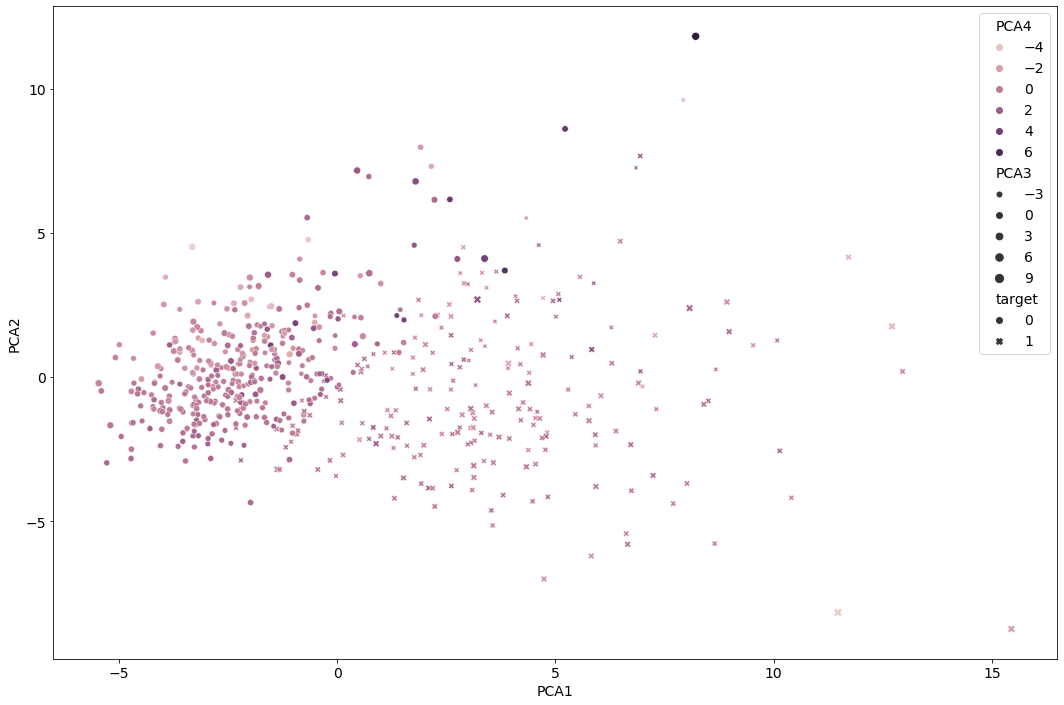

In [35]:
sns.scatterplot(data=result_df, x="PCA1", y="PCA2",size="PCA3",style="target", hue="PCA4");

### Explained Variance Ratio

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

In [36]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.44808673 0.1904235  0.10041682 0.05893816 0.04677221 0.04280972
 0.02373909 0.01675158 0.01386227 0.01191153]

 Total Variance Explained: 95.37


We can see that our first 10 principal components explain the majority of the variance in this dataset (95.3%)! This is an indication of the total information represented compared to the original data.

## Splitting Data
We start the process of training our data now that we are done with preprocessing of the data. Lets go ahead and split the data into 2 splits i.e. training and validation data. Training data will be used to train our model and we will validate the score on the validation data.

We have taken the test size as 0.25 since we don't want to train our model on the entire dataset and then end up having the model learn nothing when new set of data is thrown at it.

In [37]:
from sklearn.model_selection import train_test_split
X_train,x_test, y_train , y_test = train_test_split(scores_df, target, test_size=0.2, random_state=42)

In [38]:
X_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 10), (455,), (114, 10), (114,))

## Training Models to find the best one

In [39]:

from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes (GaussianNB)for classification
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron (MLP)for classification
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors (KNN)for classification
from sklearn.svm import SVC # Support Vector Machines (SVM)for classification
from sklearn.tree import DecisionTreeClassifier # Decision Tree (DT)for classification
from sklearn.ensemble import RandomForestClassifier # Random Forest (RF)for classification
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting (GB)for classification
from sklearn.linear_model import LogisticRegression # Logistic Regression (LR)for classification
from sklearn.ensemble import VotingClassifier # Voting Classifier for classification
from sklearn.ensemble import AdaBoostClassifier # AdaBoost Classifier for classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Linear Discriminant Analysis (LDA)for classification
from sklearn.ensemble import BaggingClassifier # Bagging Classifier for classification
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees Classifier for classification
from xgboost import XGBClassifier  # XGBoost Classifier for classification






/home/mustafa/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning:

0.1.36ubuntu1 is an invalid version and will not be supported in a future release

/home/mustafa/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning:

0.23ubuntu1 is an invalid version and will not be supported in a future release

/home/mustafa/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning:

1.13.1-unknown is an invalid version and will not be supported in a future release



In [40]:
from sklearn.metrics import accuracy_score, adjusted_rand_score,f1_score,precision_score,recall_score
from sklearn.metrics import auc, plot_roc_curve, roc_auc_score,roc_curve

In [41]:
names = ['LR', "KNN", "SVM","GBoost", "DT", "RF","XGBClas","ExtraTrees", "BaggingClas", "AdaBoost"]
classifiers = [
    LogisticRegression(solver='liblinear'),
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    XGBClassifier(max_depth=5, n_estimators=100),
    ExtraTreesClassifier(max_depth=5, n_estimators=100),
    BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    AdaBoostClassifier()]


In [42]:
voting_clasifier = VotingClassifier([('lr', LogisticRegression(solver='liblinear')), ('knn', KNeighborsClassifier(n_neighbors=5)), ('svm', SVC(kernel="linear", C=0.025)), ('gb', GradientBoostingClassifier(n_estimators=100)), ('dt', DecisionTreeClassifier(max_depth=5)), ('rf', RandomForestClassifier(max_depth=5, n_estimators=100)), ('xgb', XGBClassifier(max_depth=5, n_estimators=100)), ('et', ExtraTreesClassifier(max_depth=5, n_estimators=100)), ('bc', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)), ('ab', AdaBoostClassifier())], voting='hard')


In [43]:
def get_classifier_metric(names,classifiers, X_train, y_train, X_test, y_test):
    scores = []
    accurancy=[]
    fscores=[]
    precisions=[]
    recalls=[]
    auc_scores=[]
    for name, clf in zip(names, classifiers):
        clf.fit(X_train,y_train)
        y_pred=clf.predict(x_test)
        score = clf.score(x_test, y_test)
        accurance=accuracy_score(y_test,y_pred)
        f1score=f1_score(y_test,y_pred)
        precision=precision_score(y_test,y_pred)
        recall=recall_score(y_test,y_pred)
        auc_score=roc_auc_score(y_test,y_pred)
        scores.append(score)
        accurancy.append(accurance)
        fscores.append(f1score)
        precisions.append(precision)
        recalls.append(recall)
        auc_scores.append(auc_score)

    scores_df = pd.DataFrame()
    scores_df['name'] = names
    scores_df['score'] = scores
    scores_df["accurance"]=accurancy
    scores_df["fscore"]=fscores
    scores_df["precision"]=precisions
    scores_df["recall"]=recalls
    scores_df["auc_score"]=auc_scores
    return scores_df


In [44]:
result_scores=get_classifier_metric(names,classifiers, X_train, y_train, x_test, y_test)
result_scores

,name,score,accurance,fscore,precision,recall,auc_score
0,LR,0.991228,0.991228,0.988235,1.000000,0.976744,0.988372
1,KNN,0.956140,0.956140,0.941176,0.952381,0.930233,0.951032
2,SVM,0.982456,0.982456,0.976190,1.000000,0.953488,0.976744
3,GBoost,0.947368,0.947368,0.930233,0.930233,0.930233,0.943990
4,DT,0.938596,0.938596,0.919540,0.909091,0.930233,0.936947
5,RF,0.938596,0.938596,0.917647,0.928571,0.906977,0.932362
6,XGBClas,0.956140,0.956140,0.941176,0.952381,0.930233,0.951032
7,ExtraTrees,0.894737,0.894737,0.837838,1.000000,0.720930,0.860465
8,BaggingClas,0.956140,0.956140,0.941176,0.952381,0.930233,0.951032
9,AdaBoost,0.947368,0.947368,0.928571,0.951220,0.906977,0.939404


In [45]:
# Import some data to play with
from sklearn.preprocessing import label_binarize
iris = sdata.load_iris() # load iris data
X = iris.data  # Features data
y = iris.target # Target data

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2]) # Binarize the output data to have 3 classes 
n_classes = y.shape[1] # Number of classes
n_classes


3

In [ ]:
X.shape # Features data shape (150, 4)

(150, 4)

In [49]:
import random

In [51]:
def random1pred(boxes):
    res = []
    pred_cats = np.unique(boxes[:, -1]) # Get the unique categories
    for cat in pred_cats:
        preds = boxes[boxes[:, -1] == cat] # Get the boxes with the current category
        idx = random.sample(range(len(preds)), 1)[0] # Get a random index 
        res.append(preds[idx])

    res = np.array(res)
    return res


In [52]:


# Add noisy features to make the problem harder
random_state = np.random.RandomState(seed=0) # Random state for reproducibility
n_samples, n_features = X.shape # Number of samples and features in the data set (150, 4)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)] # Add 200 times the number of features to the data set (150, 4 + 200 * 4), 200 times the number of features is the number of noisy features, np.c_ is a concatenation function that concatenates two arrays along an axis.
# random_state.randn(2, 3) # Random array of size 2x3
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [56]:
y_train.shape

(75, 3)

In [53]:
# CREATE ROC AUC PLOT WİTH SEABORN FOR ALL CLASSIFIERS
def plotting_roc_auc(names,classifiers, X_train, y_train, x_test, y_test):
    for name, clf in zip(names, classifiers):
        clf.fit(X_train,y_train)
        y_pred=clf.predict(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f' {name} ROC curve (area = %0.2f)' % roc_auc, linewidth=2, color='green',linestyle='--')
        plt.plot([0, 1], [0, 1], 'b--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="upper right")

    plt.show()


In [55]:
plotting_roc_auc(names,classifiers, X_train, y_train, x_test, y_test)

ValueError: y should be a 1d array, got an array of shape (75, 3) instead.

We would NOT be picking the Gradient Boosting and Decision Tree since the test/validation score is less than 96%. Let's go ahead and tune some Hyperparameters.

## Hyperparameter Tuning for all the models

When creating a machine learning model, you'll be presented with design choices as to how to define your model architecture. Often times, we don't immediately know what the optimal model architecture should be for a given model, and thus we'd like to be able to explore a range of possibilities. 

In true machine learning fashion, we'll ideally ask the machine to perform this exploration and select the optimal model architecture automatically. Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning which is what he have done using `GridSearchCV` and `RandomizedSearchCV`.

In [ ]:
#?np.arange

In [ ]:
#?LogisticRegression

## GridSearch Hyperparameter Tunnig

In [ ]:
from sklearn.model_selection import GridSearchCV
C_range = np.arange(1,10,2)
penalty = ['l1', 'l2', 'elasticnet']
max_iter_range = np.arange(50,500,20)
solver=[ 'liblinear']
param_grid = dict(C=C_range, penalty=penalty,solver=solver, max_iter= max_iter_range)
model = LogisticRegression()

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train )
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

In [ ]:
neighbors_range = np.arange(1,7,1)
leaf_size_range = np.arange(10,40,10)
param_grid = dict(n_neighbors=neighbors_range, leaf_size=leaf_size_range)
model = KNeighborsClassifier(n_jobs=-1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train )
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
Kernel_range = ['linear','rbf']
C_range = np.arange(1,15,1)
param_grid = dict(kernel=Kernel_range, C= C_range)
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train )
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

## Randomized Search Cv Hyperparameter Tunnig

In [ ]:
max_depth_range = np.arange(1,8,1)
max_features_range= np.arange(1,6,1)
max_leaf_nodes_range = np.arange(2,100,10)
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(max_depth=max_depth_range, max_features=max_features_range, max_leaf_nodes=max_leaf_nodes_range)
model = RandomForestClassifier(n_jobs=-1, random_state=42)
clf = RandomizedSearchCV(model, distributions, random_state=42)
clf.fit(X_train,y_train)
print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

Now that we are done tuning all our models, let's put those numbers in as is and see what is the best model that we have for this dataset.

In [ ]:
names = ['LogisticRegression', "Nearest_Neighbors", "Linear_SVM", "Random_Forest"]
classifiers = [
    LogisticRegression(C=2,max_iter=100, penalty='l2',solver='liblinear'),
    KNeighborsClassifier(leaf_size=10, n_neighbors=5),
    SVC(kernel="linear", C=4),
    RandomForestClassifier(max_leaf_nodes=82,max_features=4, max_depth=5)]

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

In [ ]:
scores_df = pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = scores
scores_df.sort_values('score', ascending= False)

We can clearly see that **Logistic Regression** and **SVM** has given us the best accuracy score.

**SUMMARY OF THE NOTEBOOK:-**

1. 357 Benign Cases and 212 Malignant breast cancer cases. Compactness Mean is more in the Malignant Cases as compared to the Benign Cases.
2. Depending upon the data and the computational power, one should use GridSearch or RandomizedSearch for hyperparameter tuning
3. PCA is a great way to shift from high dimensionality to low dimensionality. If we have more features than observations than we run the risk of massively overfitting our model — this would generally result in terrible out of sample performance.
4. Relying on complex algorithms always should not be the way out. Sometimes, even a simpler algorithms can work wonders.

**Resources**
 https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

I HOPE This NOTEBOOK HELPED YOU IN SOME WAY. THANKS FOR UPVOTE